Projeto em que são manipulados dados fictícios de uma escola de ensino médio

In [ ]:
cd /content/drive/MyDrive/Bootcamp/ProjetoPandas


/content/drive/MyDrive/Bootcamp/ProjetoPandas


In [ ]:
import pandas as pan
mydata = pan.read_csv("Escola.csv")
mydata.head(3)

,Ano,Curso,Disciplina,Série,Alunos,Aprovados
0,2050,A,Matemática,1,43,32
1,2050,A,Português,1,47,44
2,2050,A,História,1,44,43


In [ ]:
mydata.dtypes

Ano            int64
Curso         object
Disciplina    object
Série          int64
Alunos         int64
Aprovados      int64
dtype: object

In [ ]:
mydata.shape

(72, 6)

In [ ]:
mydata.describe()

,Ano,Série,Alunos,Aprovados
count,72.000000,72.000000,72.000000,72.00000
mean,2051.000000,2.000000,65.722222,62.25000
std,0.822226,0.822226,23.732204,22.68073
min,2050.000000,1.000000,28.000000,27.00000
25%,2050.000000,1.000000,46.750000,44.00000
50%,2051.000000,2.000000,56.000000,54.00000
75%,2052.000000,3.000000,89.500000,84.75000
max,2052.000000,3.000000,105.000000,97.00000


In [ ]:
numero_de_disciplinas = mydata["Disciplina"].nunique()
print(f"O número de disciplinas é {numero_de_disciplinas}")
disciplinas = mydata["Disciplina"].unique()
print(f"As disciplinas são: {disciplinas}")

O número de disciplinas é 4
As disciplinas são: ['Matemática' 'Português' 'História' 'Geografia']


# Análise dos dados do ano de 2050

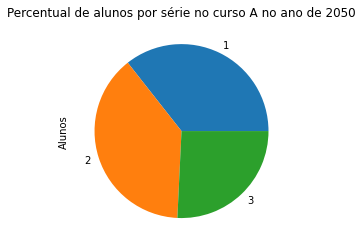

In [ ]:
curso_A_2050 = mydata.loc[(mydata['Ano'] == 2050) & (mydata["Curso"] == "A")]
curso_A_2050.groupby("Série")["Alunos"].max().plot.pie(title="Percentual de alunos por série no curso A no ano de 2050");

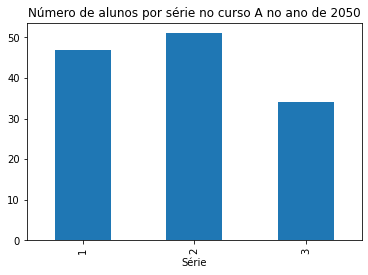

In [ ]:
curso_A_2050.groupby("Série")["Alunos"].max().plot.bar(title="Número de alunos por série no curso A no ano de 2050");

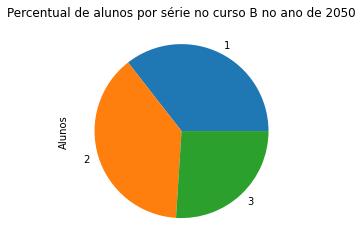

In [ ]:
curso_B_2050 = mydata.loc[(mydata['Ano'] == 2050) & (mydata["Curso"] == "B")]
curso_B_2050.groupby("Série")["Alunos"].max().plot.pie(title="Percentual de alunos por série no curso B no ano de 2050");

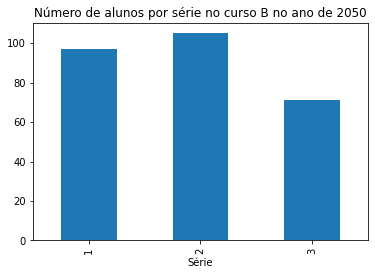

In [ ]:
curso_B_2050.groupby("Série")["Alunos"].max().plot.bar(title="Número de alunos por série no curso B no ano de 2050");

# Análise dos dados da disciplina de Matemática

O número médio de alunos na disciplina de Matemática é 379.6666666666667
O número médio do aumento ou diminuição de alunos na disciplina de Matemática é: -13.0
Atenção! O número de alunos na disciplina de matemática está em declínio.


,Ano,Curso,Disciplina,Série,Alunos,Aprovados,Percentual de aprovação
0,2050,A,Matemática,1,43,32,74.418605
4,2050,A,Matemática,2,51,45,88.235294
8,2050,A,Matemática,3,34,31,91.176471
12,2050,B,Matemática,1,89,67,75.280899
16,2050,B,Matemática,2,105,93,88.571429


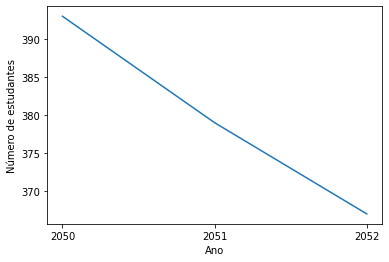

In [ ]:
Matematica = mydata.loc[(mydata['Disciplina'] == "Matemática")]
Matematica.groupby("Ano")["Alunos"].sum().plot()
import matplotlib.pyplot as plt
plt.ylabel("Número de estudantes")
plt.xticks([2050, 2051, 2052]);
matematica_numero_de_alunos_media = Matematica.groupby("Ano")["Alunos"].sum().mean()
print(f"O número médio de alunos na disciplina de Matemática é {matematica_numero_de_alunos_media}")
matematica_taxa_media = Matematica.groupby("Ano")["Alunos"].sum().diff().mean()
print(f"O número médio do aumento ou diminuição de alunos na disciplina de Matemática é: {matematica_taxa_media}")
if matematica_taxa_media < 0:
  print("Atenção! O número de alunos na disciplina de matemática está em declínio.")


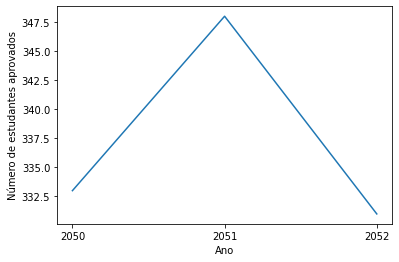

In [ ]:
Matematica.groupby("Ano")["Aprovados"].sum().plot();
plt.ylabel("Número de estudantes aprovados")
plt.xticks([2050, 2051, 2052]);

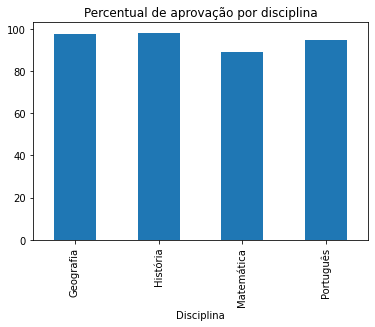

In [ ]:
mydata["Percentual de aprovação"] = mydata["Aprovados"].div(mydata["Alunos"])*100
mydata.head(2)
mydata.groupby("Disciplina")["Percentual de aprovação"].mean().plot.bar(title="Percentual de aprovação por disciplina");

## Evolução dos percentuais de aprovação médios por ano para cada curso

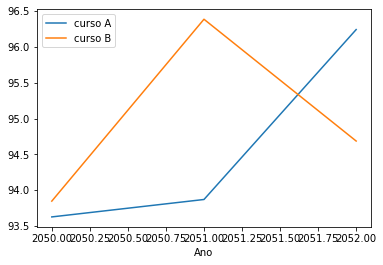

In [62]:
curso_A = mydata.loc[(mydata['Curso'] == "A")]
curso_B = mydata.loc[(mydata['Curso'] == "B")]
#plt.plot(curso_A.groupby("Ano")["Percentual de aprovação"].mean(),curso_B.groupby("Ano")["Percentual de aprovação"].mean())
curso_A.groupby("Ano")["Percentual de aprovação"].mean().plot()
curso_B.groupby("Ano")["Percentual de aprovação"].mean().plot()
plt.legend(["Curso A","Curso B"])
